# Rotational Partition Function

The following plots the rotational partition function and how each quantum number, $J$, contributions. We use `ipywidgets` to add an interactive slider to control the temperature.
The manual for `ipywidgets` can be found [here](https://ipywidgets.readthedocs.io/en/latest/index.html).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams.update({'font.size': 16, 'figure.figsize': [8.0, 6.0]})
from scipy.constants import h, c, k, N_A
from scipy.misc import derivative 

In [2]:
B = 10.591 * 100 # 1/m # rotational wave-number (related to moment of inertia)
J = np.arange(0,15,1)  # quantum numbers (called "l" in Dill's book)

def q(J,beta):
    ''' rotational partition function for a given J '''
    return (2*J+1) * np.exp( -beta*h*c*B*J*(J+1) )

def qrot(beta):
    ''' partition function for "inifinite" number of quantum numbers '''
    J = np.arange(0,500,1)
    return np.sum( q(J,beta) )

def qrotHT(beta):
    ''' partition function in the high temperature limit, i.e. summation --> integral '''
    return 1/(beta*h*c*B)

def plot(T):
    ''' plots partition function at given temperature '''
    beta = 1/(k*T)
    plt.plot(J, q(J,beta).cumsum(), 'b--o', alpha=0.7, lw=2, ms=10,
             label=r'Explicit summation <$E$>={:.2f} kT'
             .format(-derivative( qrot, beta, dx=0.001*beta ) / qrot(beta) * beta) )
    plt.plot( [0,1000], [qrotHT(beta),qrotHT(beta)], 'r-', alpha=0.5, lw=4,
             label=r'High temperature limit <$E$>={:.2f} kT'
             .format(-derivative( qrotHT, beta, dx=0.001*beta ) / qrotHT(beta) * beta))
    plt.xlim( 0, 14 )
    plt.xlabel( 'Quantum number, $J$' )
    plt.ylabel( 'Summed partition function, $q$' )
    plt.legend(loc=0, frameon=False)
    plt.title('Rotational Partition Function, $q_r$')

# this part sets up a temperature slider to control the plot
i = interact(plot, T=(50, 1000), continuous_update=False)
i.widget.children[0].description=r'$T$ (Kelvin)';

interactive(children=(IntSlider(value=525, description='T', max=1000, min=50), Output()), _dom_classes=('widge…

## Vibrational Partition Function

The exact vibrational partition function can be written as (Dill Eq. 11.26):
$$
q_v = \frac{1}{1 - e^{-\theta_v/T}}
$$

where $\theta_v$ is the _vibrational temperature_.
The average energy is obtained by taking the derivative with respect to either $T$
or $\beta$ - pick the one you find most convenient:
$$
\langle \epsilon \rangle = \frac{U}{N} = kT^2 \left( {\frac{\partial \ln q}{\partial T}} \right )
= -\left ( \frac{\partial \ln q }{\partial \beta} \right )
$$
See e.g. Dill and Bromberg, 2nd edition, Eq. 10.33.
The contribution to the heat capacity _per_ particle is
$$
c_v = \frac{C_v}{N} = \frac{\partial \langle \epsilon \rangle}{\partial T}
$$
In the high temperature limit (which is normally invalid for chemical bonds), each vibrational mode contributes with one $k_B$ to the heat capacity. This is because a classical, oscillating spring has two quadratic terms from potential and kinetic energy, respectively.

In [3]:
def q_vib(T, theta):
    ''' Exact vibrational partition function (unitless) '''
    return 1 / (1 - np.exp(-theta / T) )

def cv_vib_numeric(T, theta):
    '''
    Contribution of the heat capacity per molecule due to vibration (units of kB)
    This is the *lazy* way using Numpy's numerical differentiation function np.gradient
    '''
    dT = T[1] - T[0]
    mean_energy = k * T**2 * np.gradient( np.log( q_vib(T, theta) ), dT) # J
    return np.gradient(mean_energy, dT) / k

def cv_vib_analytic(T, theta):
    '''
    Contribution of the heat capacity per molecule due to vibration (units of kB)
    This is the analytic expression from double differentiation of the partition function
    '''
    return (theta / T)**2 * np.exp(theta / T) / (np.exp(theta / T) - 1)**2

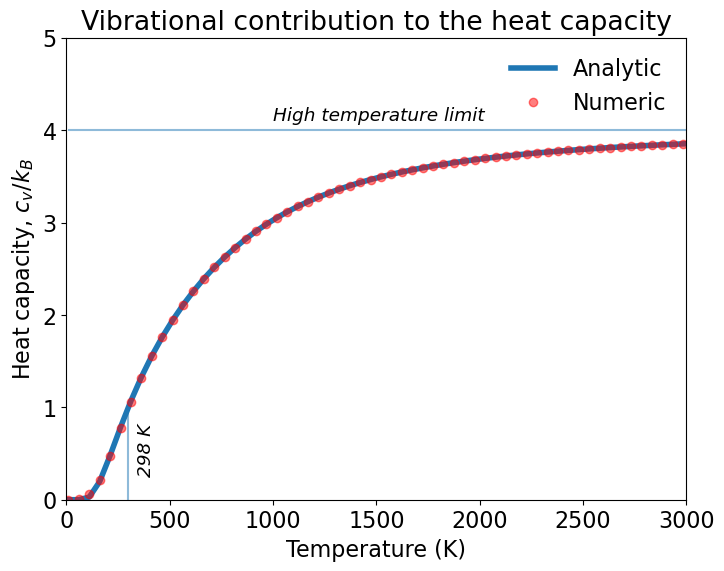

In [4]:
theta = [3360, 1890, 945, 945] # Vibrational temperatures (K)
T = np.linspace(10, 5000, 100) # Temperature interval (K)

# Sum contributions from all vibrational modes
cv_numeric = 0
cv_analytic = 0
for t in theta:
    cv_numeric += cv_vib_numeric(T, t)
    cv_analytic += cv_vib_analytic(T, t)

plt.plot(T, cv_analytic, alpha=1.0, lw=4, label='Analytic')
plt.plot(T, cv_numeric, 'ro', alpha=0.5, label='Numeric')
plt.title('Vibrational contribution to the heat capacity')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat capacity, $c_v/k_B$')
plt.legend(loc=0, frameon=False)
plt.text(1000, 4.1, 'High temperature limit', fontsize='small', style='italic')
plt.hlines(4, T.min(), T.max(), alpha=0.5)
plt.vlines(298, 0, 1, alpha=0.5)
plt.text(340, 0.3, '298 K', fontsize='small', style='italic', rotation=90)
plt.xlim(0, 3000)
plt.ylim(0, 5)
plt.show()